In [1]:
# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv(r"C:\Users\saggi\Downloads\Bookings.csv")
pd.set_option('display.max_columns',None)
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
# Checking null values in the dataset
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## Missing value percentage

In [6]:
def missing_percentage(data_frame):
    
    total_missing = data_frame.isnull().sum().sort_values(ascending=False)
    total_missing = total_missing[total_missing.values !=0]
    per = np.round(total_missing.values*100.00/len(data_frame), 2)
    df = pd.DataFrame(total_missing, columns=['Number Of Missing Values'])
    return (df.assign(percentage=per))

In [7]:
missing_percentage(df)

,Number Of Missing Values,percentage
company,112593,94.31
agent,16340,13.69
country,488,0.41
children,4,0.00


In [8]:
# As the company feature contains 94% of nan values..It is better to drop it.

In [9]:
df.drop(['company'],inplace=True,axis=1)

## Fill nan values

In [10]:
# If agent value is nan there is a high possibility that the booking was made without through any agency.
# replace children values with mode.
nan_replacements={'country':'unknown','agent':0,'children':0}
df=df.fillna(nan_replacements)

# meal contains value undefined which is equal to SC
df['meal'].replace('Undefined','SC',inplace=True)

<AxesSubplot:>

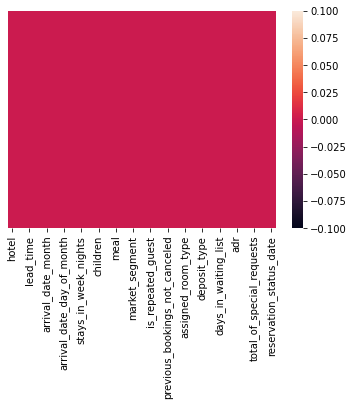

In [11]:
sns.heatmap(df.isnull(),yticklabels=False)

In [12]:
# checking dtypes of the features.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [13]:
# checking shape of the dataset
df.shape

(119390, 31)

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

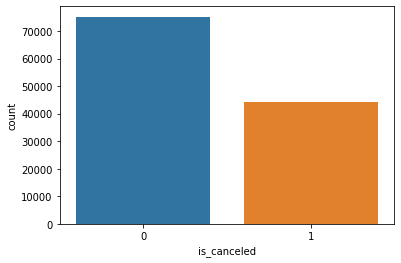

In [14]:
#checking the target variable
sns.countplot(x='is_canceled',data=df)

In [15]:
# Here you can see that the city hotels in the dataset are more as compared to resort hotels
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [16]:
# City hotel has more no. of bookings and cancelations as compared to resort hotel.

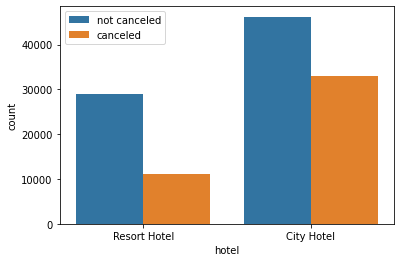

In [17]:
sns.countplot(x='hotel',hue='is_canceled',data=df)
plt.legend(['not canceled','canceled'])
plt.show()

In [18]:
# changing the name of is_canceled into target.
df['target']=np.where(df['is_canceled'].isin([1]),1,0)

In [19]:
df['target'].mean()

0.37041628277075134

<AxesSubplot:xlabel='meal', ylabel='target'>

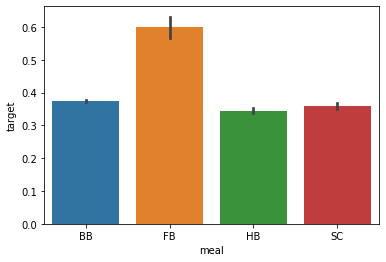

In [20]:
# Here we can see that Full Board has more cancelation rate.
from numpy import mean
sns.barplot(x='meal',y='target',data=df,estimator=mean)

In [21]:
# Here we can see that some countries are having high no. of booking rate which are getting canceled. 
# So this feature has an impact on dependent variable.
df.groupby('country')['target'].mean()

country
ABW        0.000000
AGO        0.566298
AIA        0.000000
ALB        0.166667
AND        0.714286
             ...   
VNM        0.250000
ZAF        0.387500
ZMB        0.500000
ZWE        0.500000
unknown    0.137295
Name: target, Length: 178, dtype: float64

<AxesSubplot:xlabel='is_repeated_guest', ylabel='target'>

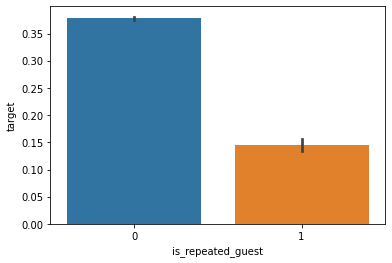

In [22]:
# Here you can see that repeated guest has low cancelation rate as compared to non repeated guests.
from numpy import mean
sns.barplot(x='is_repeated_guest',y='target',data=df,estimator=mean)

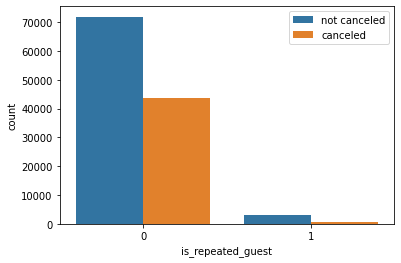

In [23]:
# from the count plot as well it is visible that the non repeated guests has more cancelation and booking rate than repeated guests.
sns.countplot(x='is_repeated_guest',hue='target',data=df)
plt.legend(['not canceled','canceled'])
plt.show()

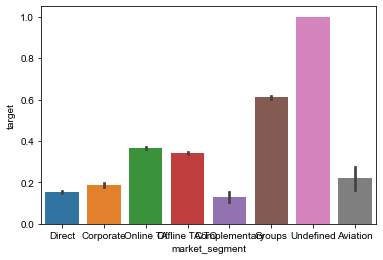

In [24]:
# Here we can see that the cancelation rate from Undefined and Groups segment is more.
sns.barplot(x='market_segment',y='target',data=df,estimator=mean)
sns.set(rc={'figure.figsize':(11.27,8.47)})

In [25]:
# But the Undefined market segment has very less observations.
# The most of the bookings and cancelations come from Online TA and also Groups have more cancelations than non cancelations.

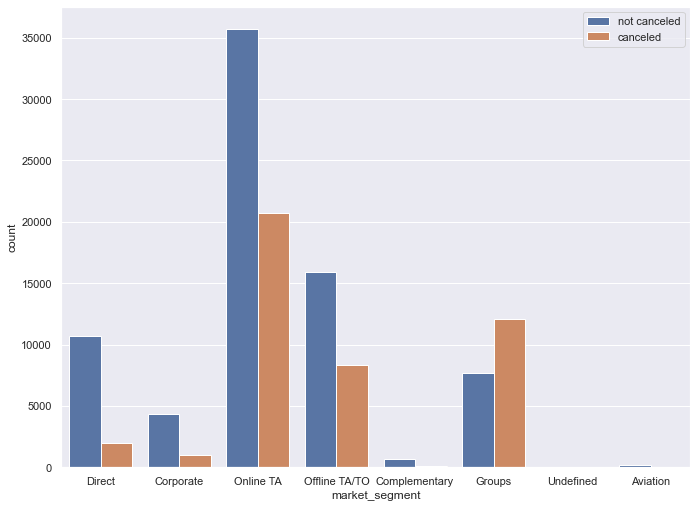

In [26]:
sns.countplot(x='market_segment',hue='target',data=df)
plt.legend(['not canceled','canceled'])
plt.show()

In [27]:
 df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

<AxesSubplot:xlabel='arrival_date_month', ylabel='target'>

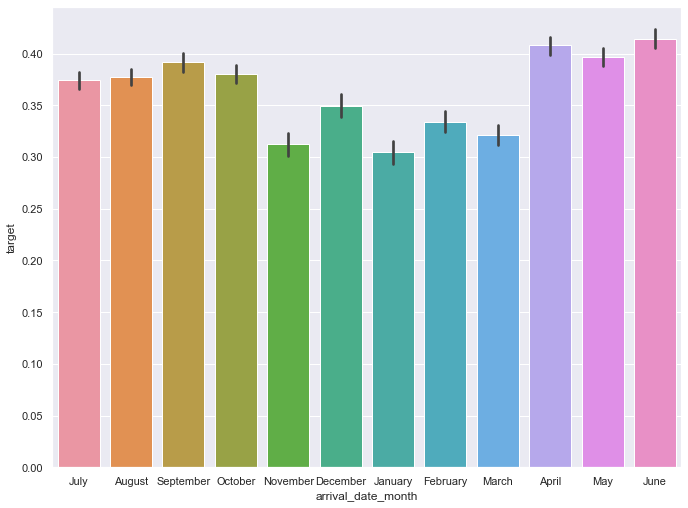

In [28]:
# Here we can see that there is a light seasonal trend and also no.of bookings for the hotels are slightly more in the mid of the year.
sns.barplot(x='arrival_date_month',y='target',data=df,estimator=mean)

In [29]:
# The month of july and August has most cancellations and bookings.

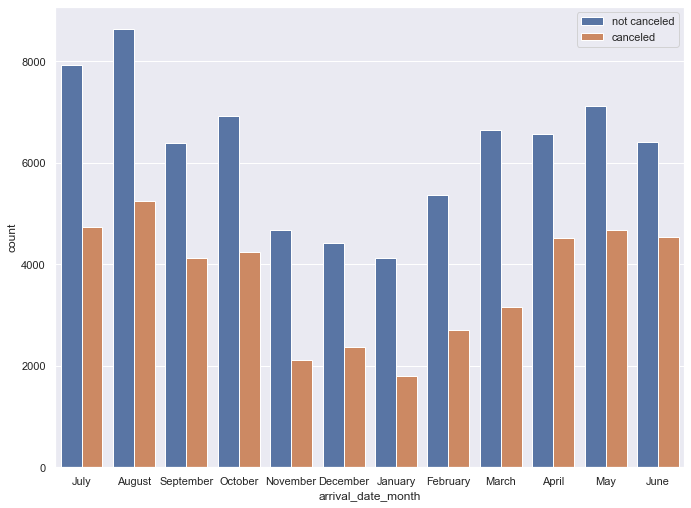

In [30]:
sns.countplot(x='arrival_date_month',hue='target',data=df)
plt.legend(['not canceled','canceled'])
plt.show()

<AxesSubplot:xlabel='stays_in_weekend_nights', ylabel='target'>

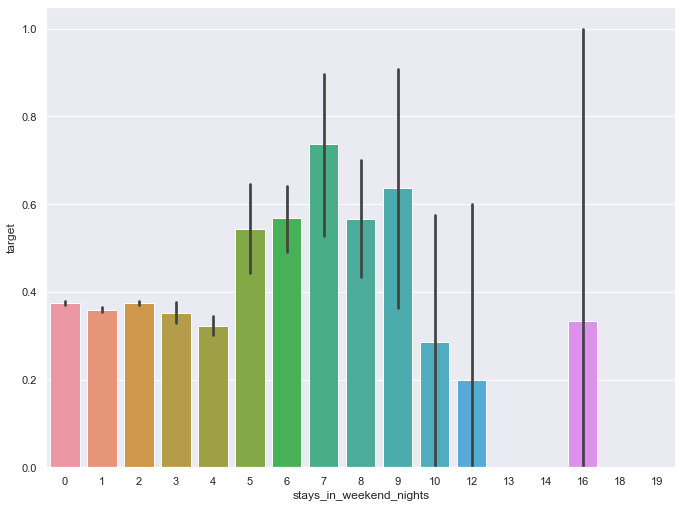

In [31]:
# Here we can see that the cancelation rate for the stays in weekends of 5 to 9 nights are more.
sns.barplot(x='stays_in_weekend_nights',y='target',data=df,estimator=mean)

<AxesSubplot:xlabel='previous_cancellations', ylabel='target'>

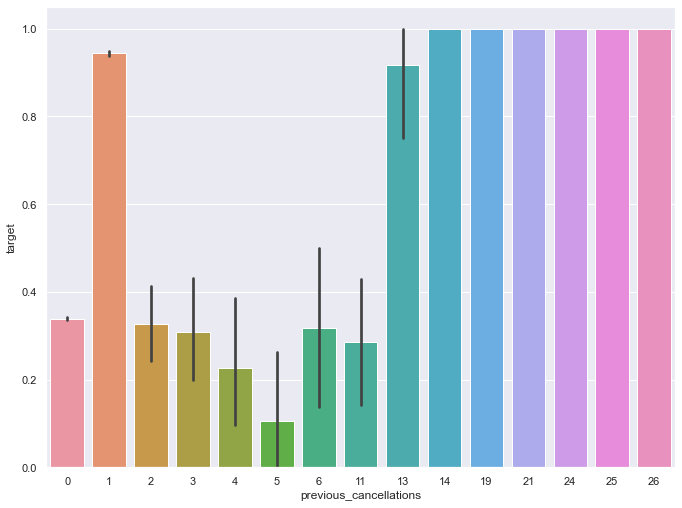

In [32]:
# Here we can see that the cancellation rate for 14 to 26 values of previous cancellations is showing as 100%

sns.barplot(x='previous_cancellations',y='target',data=df,estimator=mean)

In [33]:
# we can see that the bookings are also less for the values from 13 to 26.
df['previous_cancellations'].value_counts()

0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

In [34]:
# we will group the values of this variable into 2 groups.
df['previous_cancellations_grp']=np.where(df['previous_cancellations'].isin([0]),0,1)

In [35]:
# Here we can see that previous cancellation has an impact for the current cancellation rate.
# That means if there is 1 or more than 1 previous cancellations then there is higher chance of getting a booking canceled. so this has an impact on the target variable. 
df.groupby(['previous_cancellations_grp'])['target'].mean()

previous_cancellations_grp
0    0.339061
1    0.916410
Name: target, dtype: float64

<AxesSubplot:xlabel='booking_changes', ylabel='target'>

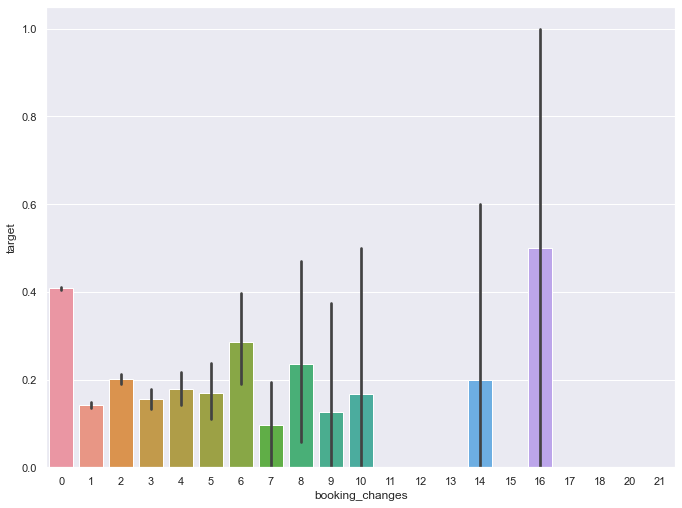

In [36]:
# we can see that when there are 16 number of changes done to the booking once it is done has more chances of getting the booking canceled.
# The chances are almost 50% but the booking count 16 number of changes done to the booking are only 2.therefore this feature has not much impact on the target variable.
sns.barplot(x='booking_changes',y='target',data=df,estimator=mean)

In [37]:
df['booking_changes'].value_counts()

0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
16         2
17         2
12         2
11         2
20         1
21         1
18         1
Name: booking_changes, dtype: int64

<AxesSubplot:xlabel='deposit_type', ylabel='target'>

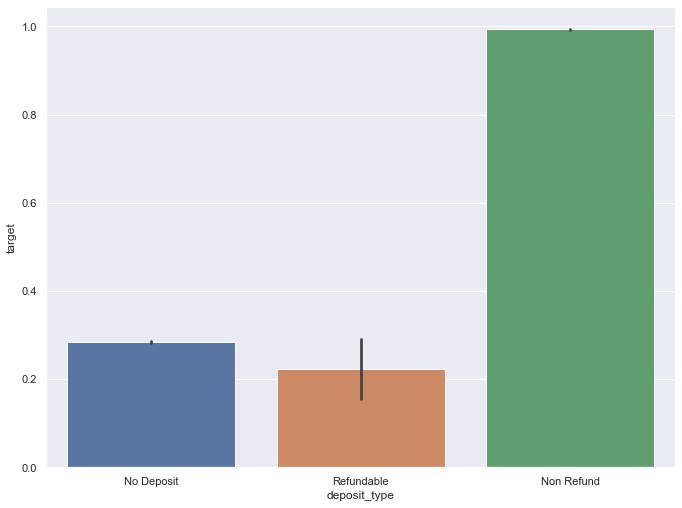

In [38]:
sns.barplot(x='deposit_type',y='target',data=df,estimator=mean)

<AxesSubplot:xlabel='deposit_type', ylabel='count'>

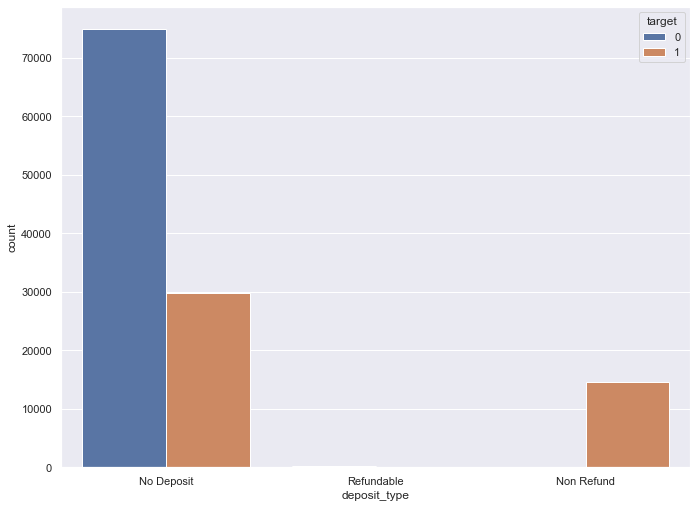

In [39]:
# Here we can see that the Non refundable deposit type has most cancelation ratei.e almost 100%.
sns.countplot(x='deposit_type',hue='target',data=df)

In [40]:
df['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

<AxesSubplot:xlabel='reserved_room_type', ylabel='target'>

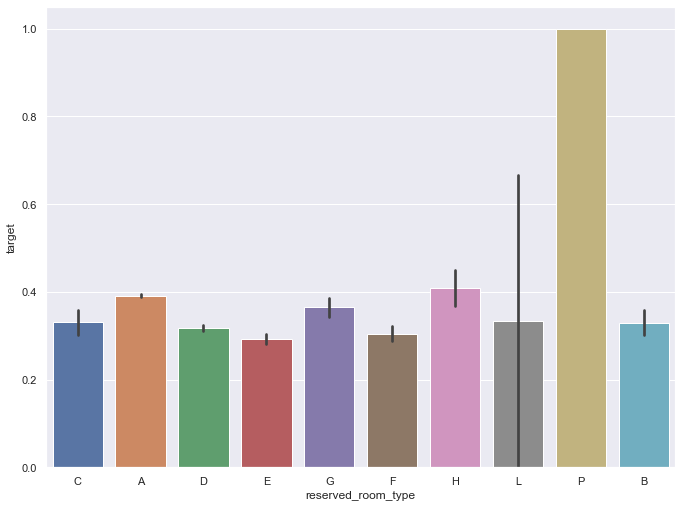

In [41]:
# Reserved_room_type p has 100% cancelation rate but It's value counts are less so this feature is not a good discriminator.
sns.barplot(x='reserved_room_type',y='target',data=df,estimator=mean)

<AxesSubplot:xlabel='reserved_room_type', ylabel='count'>

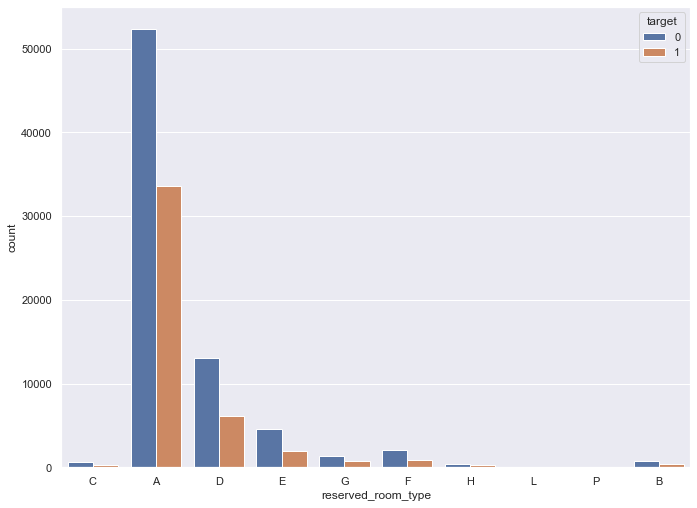

In [42]:
# Rserved room type can be a good predictor as there aresome cancelation rate based upon reserved_room_type
sns.countplot(x='reserved_room_type',hue='target',data=df)

In [43]:
df['reserved_room_type'].value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

<AxesSubplot:xlabel='customer_type', ylabel='count'>

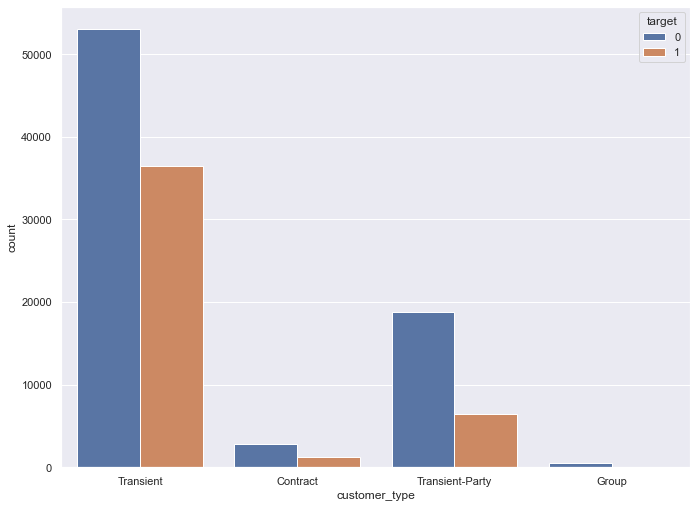

In [44]:
#Here we can see that transient cutomer type transient  has more cancelatation rate and also it has more no. of observations as well.
sns.countplot(x='customer_type',hue='target',data=df)

In [45]:
#Transient has highest no. of observations.
df.groupby('customer_type')['target'].count()

customer_type
Contract            4076
Group                577
Transient          89613
Transient-Party    25124
Name: target, dtype: int64

<AxesSubplot:xlabel='total_of_special_requests', ylabel='target'>

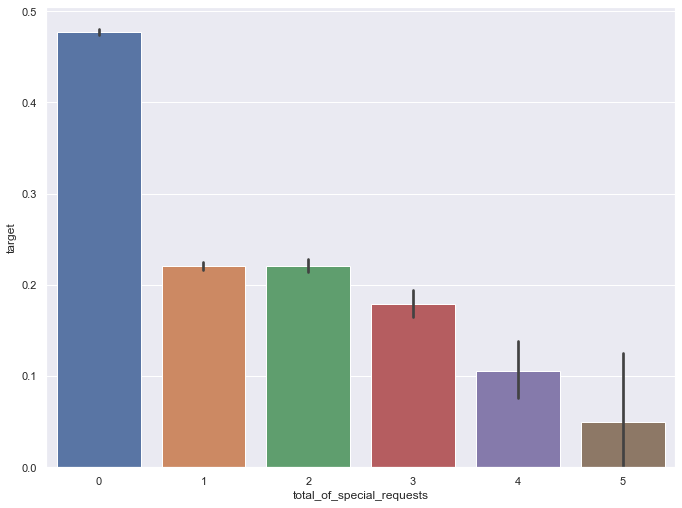

In [47]:
# We can see that this variable o special request has more cancellation rate than others. 
# We can also see that as total_no_of_special requests increases the probability of cancelation rate decreases. So there is correlation with the target variable.
sns.barplot(x='total_of_special_requests',y='target',data=df,estimator=mean)

In [48]:
df['days_in_waiting_list'].unique()

array([  0,  50,  47,  65, 122,  75, 101, 150, 125,  14,  60,  34, 100,
        22, 121,  61,  39,   5,   1,   8, 107,  43,  52,   2,  11, 142,
       116,  13,  44,  97,  83,   4, 113,  18,  20, 185,  93, 109,   6,
        37, 105, 154,  64,  99,  38,  48,  33,  77,  21,  80,  59,  40,
        58,  89,  53,  49,  69,  87,  91,  57, 111,  79,  98,  85,  63,
        15,   3,  41, 224,  31,  56, 187, 176,  71,  55,  96, 236, 259,
       207, 215, 160, 120,  30,  32,  27,  62,  24, 108, 147, 379,  70,
        35, 178, 330, 223, 174, 162, 391,  68, 193,  10,  76,  16,  28,
         9, 165,  17,  25,  46,   7,  84, 175, 183,  23, 117,  12,  54,
        26,  73,  45,  19,  42,  72,  81,  92,  74, 167,  36], dtype=int64)

<AxesSubplot:xlabel='day_waiting_rank', ylabel='target'>

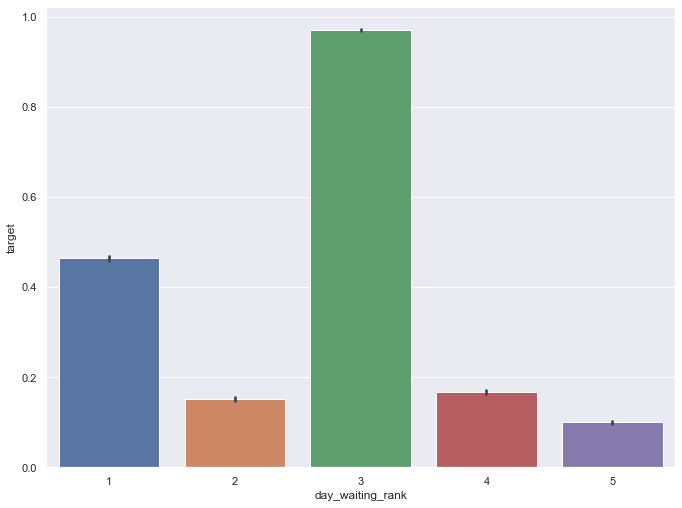

In [49]:
# As we can see that therre are lot of unique values as it is a continuous variable. 
# So inorder to understand it graphically we will rank it.
df['day_waiting_rank']=pd.qcut(df['days_in_waiting_list'].rank(method='first').values,5,duplicates='drop').codes+1
sns.barplot(x='day_waiting_rank',y='target',data=df,estimator=mean)

In [50]:
# Each of the 5 rank has equal amount of observations.
df['day_waiting_rank'].value_counts()

1    23878
5    23878
2    23878
3    23878
4    23878
Name: day_waiting_rank, dtype: int64

In [51]:
df['days_in_waiting_list'].value_counts()

0      115692
39        227
58        164
44        141
31        127
        ...  
116         1
109         1
37          1
89          1
36          1
Name: days_in_waiting_list, Length: 128, dtype: int64

In [52]:
df.groupby(['day_waiting_rank'])['days_in_waiting_list'].max()

day_waiting_rank
1      0
2      0
3      0
4      0
5    391
Name: days_in_waiting_list, dtype: int64

In [53]:
# The third rank is standing out has hight event rate. Let us group the ranks into 2 groups.
df['day_waiting_grp']=np.where(df['day_waiting_rank'].isin([3]),0,1)

In [54]:
# The cancelation rate from 0th group is higher for the variable.
df.groupby(['day_waiting_grp'])['target'].mean()

day_waiting_grp
0    0.971396
1    0.220171
Name: target, dtype: float64

In [55]:
# If you will see the count for the 0th group has good amount of observations. So this is a good predictor.
df.groupby(['day_waiting_rank'])['days_in_waiting_list'].count()

day_waiting_rank
1    23878
2    23878
3    23878
4    23878
5    23878
Name: days_in_waiting_list, dtype: int64

In [56]:
# For the lead time feature we can see that as the lead time increases the cancelation rate also increases.

<AxesSubplot:xlabel='lead_time_rank', ylabel='target'>

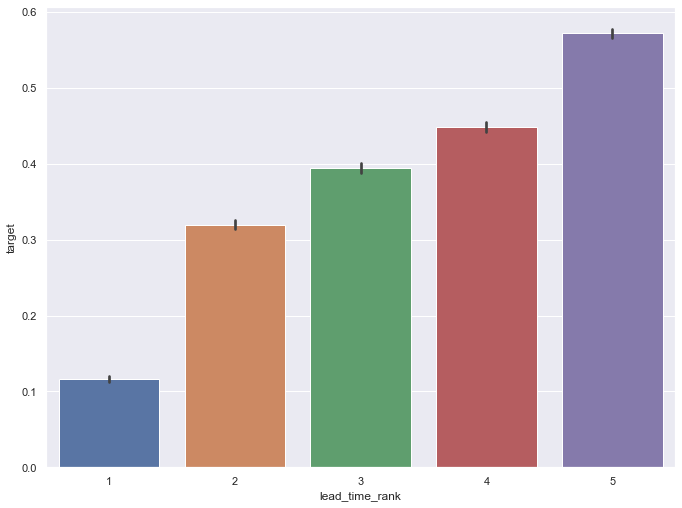

In [57]:
df['lead_time_rank']=pd.qcut(df['lead_time'].rank(method='first').values,5,duplicates='drop').codes+1
sns.barplot(x='lead_time_rank',y='target',data=df,estimator=mean)

In [58]:
df.groupby(['lead_time_rank'])['lead_time'].min()

lead_time_rank
1      0
2     11
3     45
4     99
5    184
Name: lead_time, dtype: int64

In [59]:
# from 14 to 24 stays in week nights have more no. of cancelation rate.

<AxesSubplot:xlabel='stays_in_week_nights', ylabel='is_canceled'>

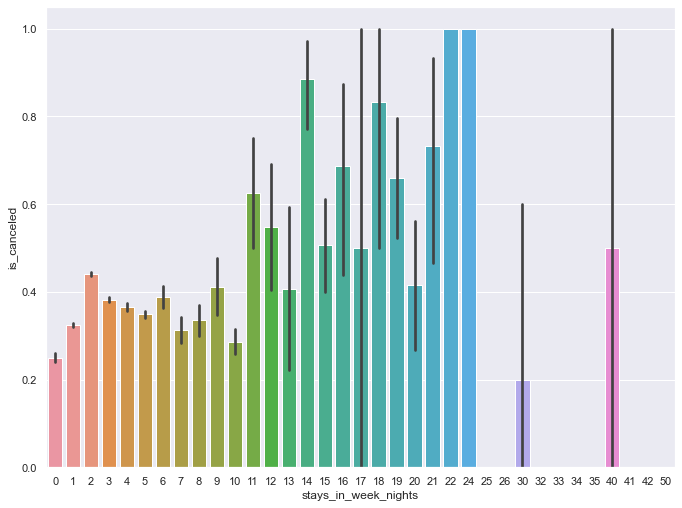

In [60]:
sns.barplot(x='stays_in_week_nights',y='is_canceled',data=df,estimator=mean)

In [61]:
# But the observations fro 14 to 24 stays in week nights are very few.
# So we will just rank those values.

<AxesSubplot:xlabel='stays_in_week_nights_rank', ylabel='target'>

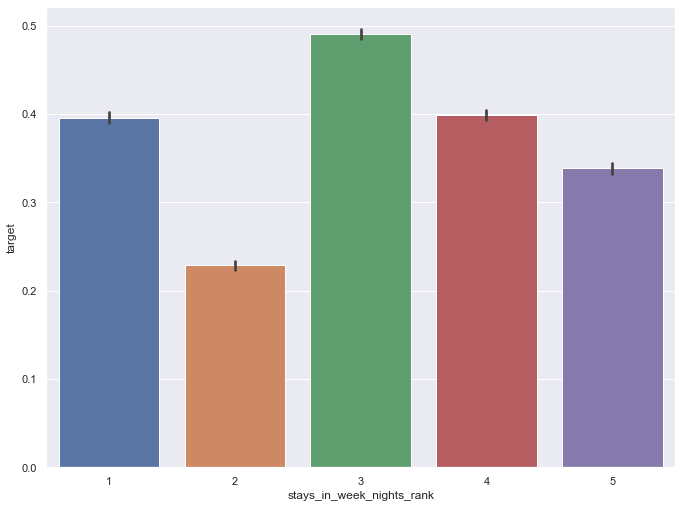

In [62]:
df['stays_in_week_nights_rank']=pd.qcut(df['stays_in_week_nights'].rank(method='first').values,5,duplicates='drop').codes+1
sns.barplot(x='stays_in_week_nights_rank',y='target',data=df,estimator=mean)

In [63]:
# So we can see that the rank 1,3 and 4 have high probability of cancelation rate. 

In [64]:
# Assigning variables numerical data and categorical data
col_num=['lead_time','adr','stays_in_weekend_nights']
col_char=['day_waiting_grp','total_of_special_requests','customer_type','reserved_room_type',
          'distribution_channel','market_segment','stays_in_week_nights_rank','previous_cancellations_grp',]

In [65]:
# Using get_dummies to treat categorical data.

In [66]:
X_char_dummy=pd.get_dummies(df[col_char],drop_first= True)

In [67]:
# Doing concatenation of both the 
X_all=pd.concat([df[col_num],X_char_dummy],axis=1,join='inner')

In [68]:
X_all.head()

,lead_time,adr,stays_in_weekend_nights,day_waiting_grp,total_of_special_requests,stays_in_week_nights_rank,previous_cancellations_grp,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined
0,342,0.0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,737,0.0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,7,75.0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,13,75.0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,14,98.0,0,1,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [69]:
X=X_all
Y=df['target']

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\saggi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
y_pred=logreg.predict(X_test)
logreg.score(X_test,y_test)

0.8696429069994696

In [73]:
dt=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=7,min_samples_leaf=5)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, random_state=100)

In [74]:
y_pred_dt=dt.predict(X_test)
dt.score(X_test,y_test)

0.8775441829298937

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [77]:
y_pred_rf=rf.predict(X_test)
rf.score(X_test,y_test)

0.9168551246614736

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[21736   635]
 [ 4034  9412]]


In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94     22371
           1       0.93      0.85      0.88     13446

    accuracy                           0.92     35817
   macro avg       0.92      0.90      0.91     35817
weighted avg       0.92      0.92      0.92     35817



In [80]:
# As We  are getting maximum accuracy with Random Forest we will go with the model of Randomforest